# Worksheet 19

Name:  
UID: 

### Topics

- Logistic Regression

## Logistic Regression

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=750, centers=centers, cluster_std=1, random_state=0)

# LINE
def generate_line_data():
    # create some space between the classes
    X = np.array(list(filter(lambda x : x[0] - x[1] < -.5 or x[0] - x[1] > .5, t)))
    Y = np.array([1 if x[0] - x[1] >= 0 else 0 for x in X])
    return X, Y

# CIRCLE
def generate_circle_data(t):
    # create some space between the classes
    X = np.array(list(filter(lambda x : (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 < 1 or (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 > 1.5, t)))
    Y = np.array([1 if (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 >= 1 else 0 for x in X])
    return X, Y

# XOR
def generate_xor_data():
    X = np.array([
        [0,0],
        [0,1],
        [1,0],
        [1,1]])
    Y = np.array([x[0]^x[1] for x in X])
    return X, Y

a) Using the above code, generate and plot data that is linearly separable.

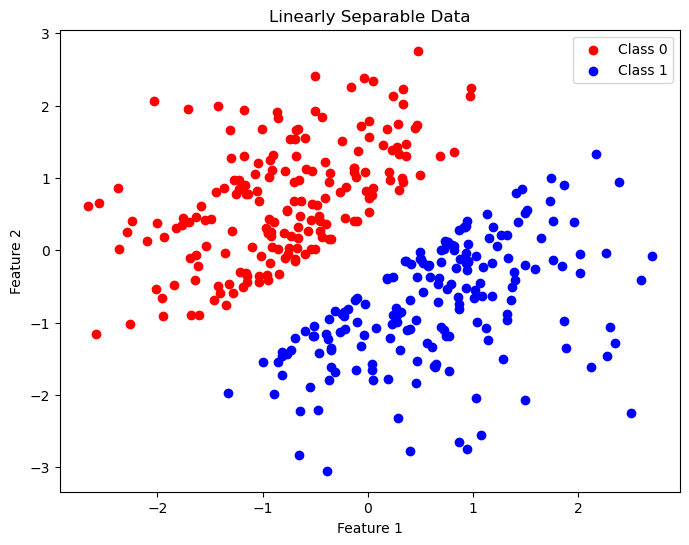

In [1]:
centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=500, centers=centers, cluster_std=1, random_state=0)

def generate_line_data():
    X = np.array(list(filter(lambda x: x[0] - x[1] < -.5 or x[0] - x[1] > .5, t)))
    Y = np.array([1 if x[0] - x[1] >= 0 else 0 for x in X])
    return X, Y

X, Y = generate_line_data()

plt.figure(figsize=(8, 6))
plt.scatter(X[Y == 0][:, 0], X[Y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[Y == 1][:, 0], X[Y == 1][:, 1], color='blue', label='Class 1')
plt.title("Linearly Separable Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


b) Fit a logistic regression model to the data a print out the coefficients.

In [5]:
model = LogisticRegression().fit(X, Y)
model.coef_
model.intercept_

array([0.08954039])

c) Using the coefficients, plot the line through the scatter plot you created in a). (Note: you need to do some math to get the line in the right form)

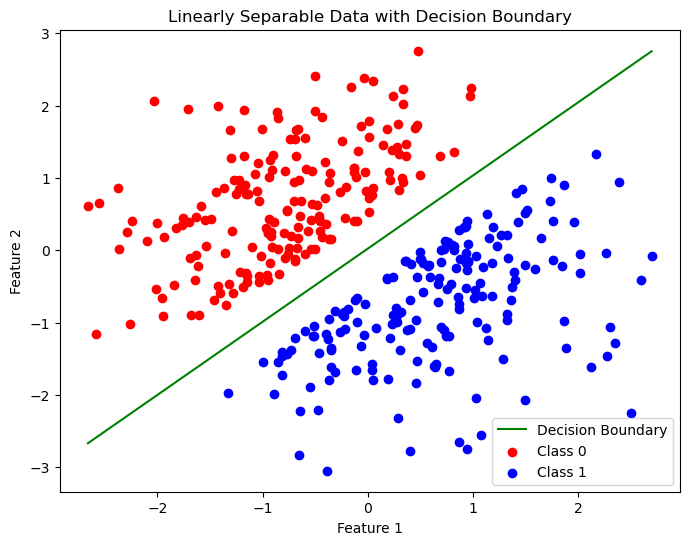

In [6]:
model = LogisticRegression()
model.fit(X, Y)

w = model.coef_[0]
b = model.intercept_[0]

x_values = np.linspace(X[:,0].min(), X[:,0].max(), 300)
y_values = -(w[0]/w[1]) * x_values - b/w[1]

plt.figure(figsize=(8, 6))
plt.scatter(X[Y == 0][:, 0], X[Y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[Y == 1][:, 0], X[Y == 1][:, 1], color='blue', label='Class 1')
plt.plot(x_values, y_values, label='Decision Boundary', color='green')
plt.title("Linearly Separable Data with Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

d) Using the above code, generate and plot the CIRCLE data.

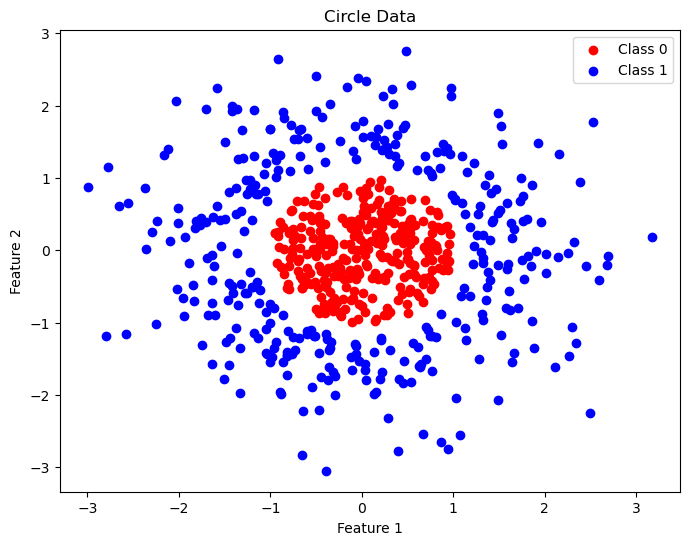

In [7]:
def generate_circle_data(t):
    X = np.array(list(filter(lambda x: (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 < 1 or (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 > 1.5, t)))
    Y = np.array([1 if (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 >= 1 else 0 for x in X])
    return X, Y

X_circle, Y_circle = generate_circle_data(t)

plt.figure(figsize=(8, 6))
plt.scatter(X_circle[Y_circle == 0][:, 0], X_circle[Y_circle == 0][:, 1], color='red', label='Class 0')
plt.scatter(X_circle[Y_circle == 1][:, 0], X_circle[Y_circle == 1][:, 1], color='blue', label='Class 1')
plt.title("Circle Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

e) Notice that the equation of an ellipse is of the form $$ax^2 + by^2 = c$$

Fit a logistic regression model to an appropriate transformation of X.

In [8]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_circle_transformed = poly.fit_transform(X_circle)

model_circle = LogisticRegression()
model_circle.fit(X_circle_transformed, Y_circle)

coef = model_circle.coef_[0]
intercept = model_circle.intercept_[0]

coef, intercept

(array([ 0.02985162, -0.04753247,  4.90954898,  0.37928   ,  4.95645605]),
 -6.476593846901584)

f) Plot the decision boundary using the code below.

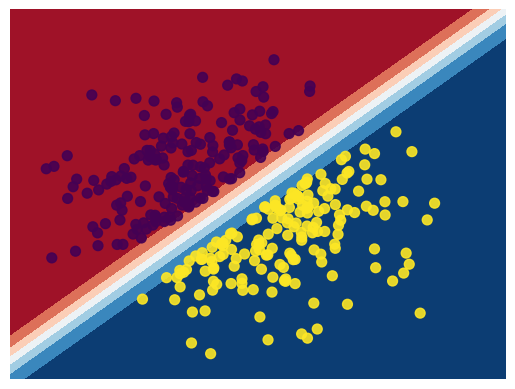

In [9]:
# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
meshData = np.c_[xx.ravel(), yy.ravel()]

fig, ax = plt.subplots()
A = model.predict_proba(meshData)[:, 1].reshape(xx.shape)
Z = model.predict(meshData).reshape(xx.shape)
ax.contourf(xx, yy, A, cmap="RdBu", vmin=0, vmax=1)
ax.axis('off')

# Plot also the training points
ax.scatter(X[:, 0], X[:, 1], c=Y, s=50, alpha=0.9)
plt.show()

g) Plot the XOR data. In this 2D space, the data is not linearly separable, but by introducing a new feature $$x_3 = x_1 * x_2$$

(called an interaction term) we should be able to find a hyperplane that separates the data in 3D. Plot this new dataset in 3D.

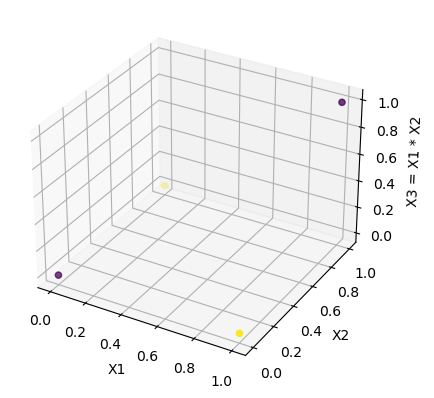

In [11]:
from mpl_toolkits.mplot3d import Axes3D

def generate_xor_data():
    X = np.array([
        [0,0],
        [0,1],
        [1,0],
        [1,1]])
    Y = np.array([x[0]^x[1] for x in X])
    return X, Y

X_xor, Y_xor = generate_xor_data()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_xor[:, 0], X_xor[:, 1], X_xor[:, 0] * X_xor[:, 1], c=Y_xor)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3 = X1 * X2')
plt.show()

h) Apply a logistic regression model using the interaction term. Plot the decision boundary.

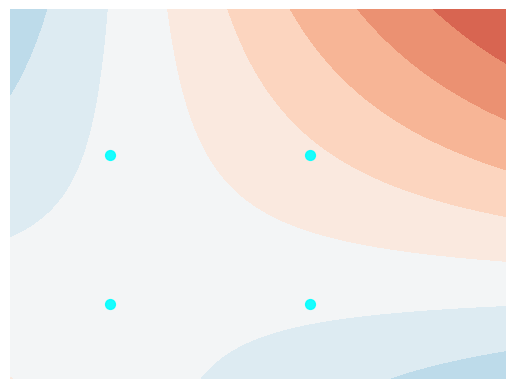

In [12]:
poly = PolynomialFeatures(interaction_only=True)
lr = LogisticRegression(verbose=0)
model = make_pipeline(poly, lr).fit(X, Y)

# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
meshData = np.c_[xx.ravel(), yy.ravel()]

fig, ax = plt.subplots()
A = model.predict_proba(meshData)[:, 1].reshape(xx.shape)
Z = model.predict(meshData).reshape(xx.shape)
ax.contourf(xx, yy, A, cmap="RdBu", vmin=0, vmax=1)
ax.axis('off')

# Plot also the training points
ax.scatter(X[:, 0], X[:, 1], color=Y, s=50, alpha=0.9)
plt.show()

In [ ]:
%matplotlib widget
for i in range(20000):
    for solver in ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']:
        X_transform = PolynomialFeatures(interaction_only=True, include_bias=False).fit_transform(X)
        model = LogisticRegression(verbose=0, solver=solver, random_state=i, max_iter=10000)
        model.fit(X_transform, Y)
        if model.score(X_transform, Y) > .75:
            print("random state = ", i)
            print("solver = ", solver)
            break


xx, yy = np.meshgrid([x / 10 for x in range(-1, 11)], [x / 10 for x in range(-1, 11)])
z = - model.intercept_ / model.coef_[0][2] - model.coef_[0][0] * xx / model.coef_[0][2] - model.coef_[0][1] * yy / model.coef_[0][2]

ax = plt.axes(projection='3d')
ax.scatter3D(X[: , 0], X[: , 1], X[: , 0]* X[: , 1], c=Y)
ax.plot_surface(xx, yy, z, alpha=0.5)
plt.show()

i) Using the code below that generates 3 concentric circles, fit a logisitc regression model to it and plot the decision boundary.

In [21]:
# Generating concentric circles data using the provided function
def generate_circles_data(t):
    def label(x):
        if x[0]**2 + x[1]**2 >= 2 and x[0]**2 + x[1]**2 < 8:
            return 1
        if x[0]**2 + x[1]**2 >= 8:
            return 2
        return 0
    # create some space between the classes
    X = np.array(list(filter(lambda x: (x[0]**2 + x[1]**2 < 1.8 or x[0]**2 + x[1]**2 > 2.2) and (x[0]**2 + x[1]**2 < 7.8 or x[0]**2 + x[1]**2 > 8.2), t)))
    Y = np.array([label(x) for x in X])
    return X, Y

t, _ = datasets.make_blobs(n_samples=1500, centers=centers, cluster_std=2, random_state=0)
X_circles, Y_circles = generate_circles_data(t)

# Fitting a logistic regression model with polynomial features
poly = PolynomialFeatures(2)
lr = LogisticRegression()
model = make_pipeline(poly, lr).fit(X_circles, Y_circles)

# Predicting the labels for a grid to plot the decision boundary
x_min, x_max = X_circles[:, 0].min() - 1, X_circles[:, 0].max() + 1
y_min, y_max = X_circles[:, 1].min() - 1, X_circles[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting the decision boundaries
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_circles[:, 0], X_circles[:, 1], c=Y_circles, edgecolors='k', cmap=plt.cm.coolwarm)
plt.title("Concentric Circles Data with Decision Boundaries")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


/Users/jialuli/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …